# Requirements

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset

In [7]:
# Path to extracted folder containing patient data files
data_dir = '/Users/sandhyasrinivasan/clinical-readmission-prediction/data/diabetes/Diabetes-Data'

# Code field mappings
code_map = {
    '33': 'reg_insulin',
    '34': 'nph_insulin',
    '35': 'ultralente_insulin',
    '48': 'glucose_unspecified_1',
    '57': 'glucose_unspecified_2',
    '58': 'glucose_pre_breakfast',
    '59': 'glucose_post_breakfast',
    '60': 'glucose_pre_lunch',
    '61': 'glucose_post_lunch',
    '62': 'glucose_pre_supper',
    '63': 'glucose_post_supper',
    '64': 'glucose_pre_snack',
    '65': 'hypoglycemia',
    '66': 'typical_meal',
    '67': 'high_meal',
    '68': 'low_meal',
    '69': 'typical_exercise',
    '70': 'high_exercise',
    '71': 'low_exercise',
    '72': 'special_event'
}

patient_data = []

for filename in sorted(os.listdir(data_dir)):
    if filename.startswith("data-") and filename[5:].isdigit():
        filepath = os.path.join(data_dir, filename)

        # Parse events from the file
        events = []
        with open(filepath, 'r') as f:
            for line in f:
                parts = line.strip().split('\t')
                if len(parts) == 4:
                    data, time, code, value = parts
                    events.append({'code': code, 'value': value})

    
        # Initialize summary
        patient_summary = {'patient_id': filename}
        glucose_values = []
        insulin_count = 0
        hypo_event_count = 0
        meal_events = 0
        exercise_events = 0

        for event in events:
            code = event['code']
            value = event['value']

            name = code_map.get(code, f"code_{code}")

            # Glucose values
            if 'glucose' in name:
                try:
                    glucose_values.append(float(value))
                except ValueError:
                    continue
            # Insulin count
            if 'insulin' in name:
                insulin_count += 1
            # Hypoglycemia
            if code == '65':
                hypo_event_count += 1
            # Meal
            if code in ['66', '67', '68']:
                meal_events += 1
            # Exercise
            if code in ['69', '70', '71']:
                exercise_events += 1

        # Add summary features
        patient_summary['avg_glucose'] = round(sum(glucose_values)/len(glucose_values), 2) if glucose_values else None
        patient_summary['glucose_readings'] = len(glucose_values)
        patient_summary['insulin_doses'] = insulin_count
        patient_summary['hypo_events'] = hypo_event_count
        patient_summary['meal_events'] = meal_events
        patient_summary['exercise_events'] = exercise_events
        patient_summary['total_events'] = len(events)

        patient_data.append(patient_summary)

# Build DataFrame
df = pd.DataFrame(patient_data)
df.head()

,patient_id,avg_glucose,glucose_readings,insulin_doses,hypo_events,meal_events,exercise_events,total_events
0,data-01,159.05,369,523,51,0,0,943
1,data-02,194.17,373,381,0,0,0,761
2,data-03,134.36,139,134,3,10,0,300
3,data-04,161.01,141,145,1,6,0,300
4,data-05,166.19,144,148,0,2,0,300


## Data Overview

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patient_id        70 non-null     object 
 1   avg_glucose       70 non-null     float64
 2   glucose_readings  70 non-null     int64  
 3   insulin_doses     70 non-null     int64  
 4   hypo_events       70 non-null     int64  
 5   meal_events       70 non-null     int64  
 6   exercise_events   70 non-null     int64  
 7   total_events      70 non-null     int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 4.5+ KB


In [10]:
df.describe()

,avg_glucose,glucose_readings,insulin_doses,hypo_events,meal_events,exercise_events,total_events
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,162.527429,193.185714,205.257143,4.728571,7.342857,4.357143,418.057143
std,29.159428,155.501926,162.865525,8.247831,11.561914,6.892625,301.863386
min,84.360000,31.000000,0.000000,0.000000,0.000000,0.000000,51.000000
25%,144.002500,100.250000,116.750000,0.000000,0.000000,0.000000,297.750000
50%,160.980000,120.000000,160.500000,1.000000,2.500000,0.000000,300.000000
75%,177.885000,234.000000,200.250000,6.000000,10.000000,5.000000,447.500000
max,219.030000,616.000000,714.000000,51.000000,70.000000,28.000000,1327.000000


In [11]:
df.isnull().sum()

patient_id          0
avg_glucose         0
glucose_readings    0
insulin_doses       0
hypo_events         0
meal_events         0
exercise_events     0
total_events        0
dtype: int64

## Distributions

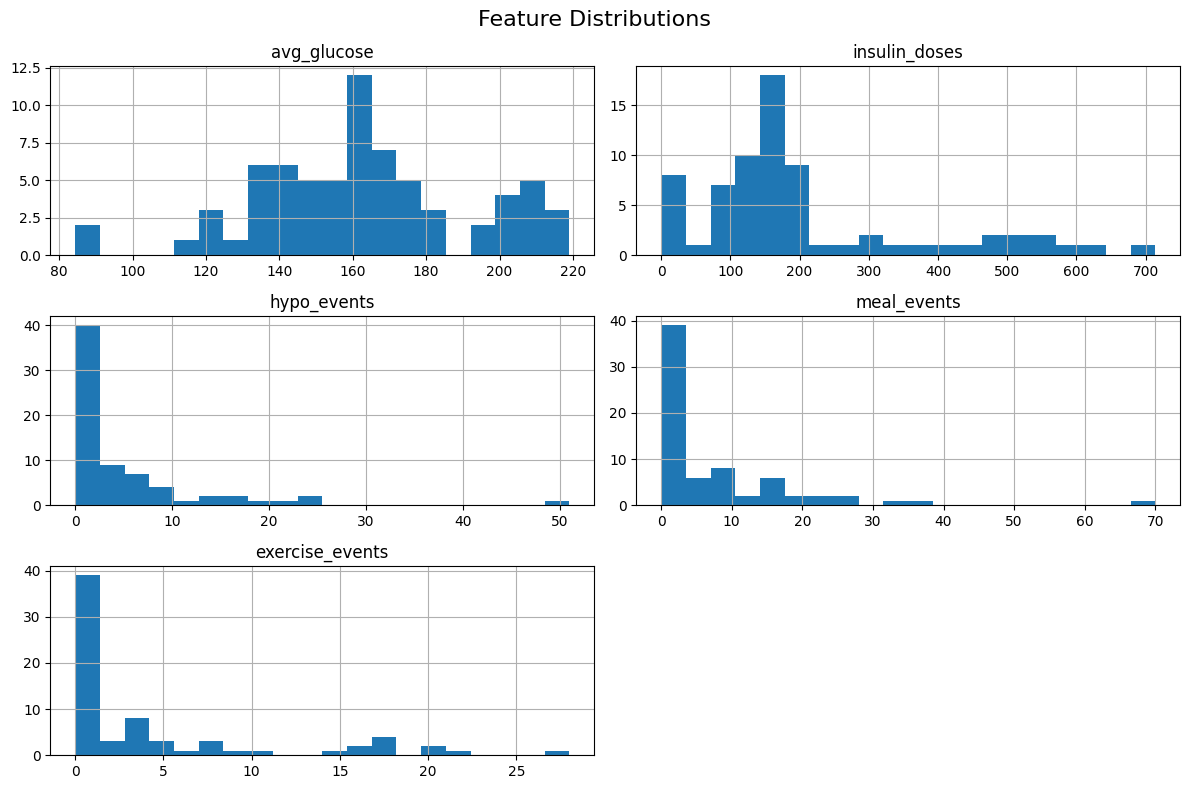

In [12]:
features = ['avg_glucose', 'insulin_doses', 'hypo_events', 'meal_events', 'exercise_events']
df[features].hist(bins=20, figsize=(12, 8))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

## Outliers

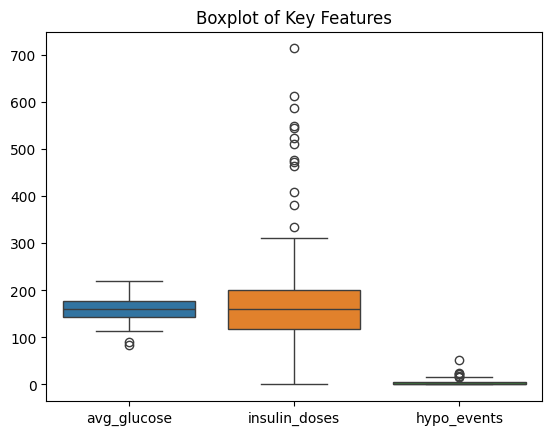

In [13]:
sns.boxplot(data=df[['avg_glucose', 'insulin_doses', 'hypo_events']])
plt.title("Boxplot of Key Features")
plt.show()

## Correlations

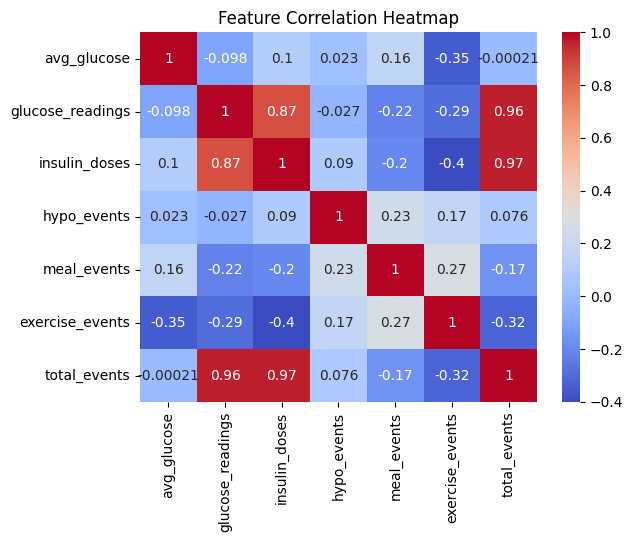

In [14]:
corr = df.drop(columns=['patient_id']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()